# Problem Statement

For any organization, even the slightest chance of financial risk can not be ignored. Organizations conduct regular inspections on their expenditures and revenue to make sure that they do not fall below the critical limit. In this hackathon, you as a data scientist must use the given data to predict whether an organization is under a possible financial risk or not.

Given are 7 distinguishing factors that can provide insight into whether an organization may face a financial risk or not. Your objective as a data scientist is to build a machine learning model that can predict if an organization will fall under the risk using the given features.

# Phase1: Model Building On Training Data

# Step1: Read Data

In [1]:
train = pd.read_csv("Train.csv")
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [2]:
train.shape

(543, 8)

In [3]:
train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

# Step2: Exploratory Data Analysis

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

## 2.1 Missing Data Analysis 

In [4]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

## 2.2 Data Type Analysis 

In [5]:
train.dtypes

City                      int64
Location_Score          float64
Internal_Audit_Score      int64
External_Audit_Score      int64
Fin_Score                 int64
Loss_score                int64
Past_Results              int64
IsUnderRisk               int64
dtype: object

## 2.3 Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

<b> Continuous Variables:- </b> In case of continuous variables, we need to understand the central tendency and spread of the variable. These are measured using various statistical metrics such as Histogram and Bar plots: 

In [6]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


### 2.3.1 Box Plot of CONTINUOUS variables 

In [7]:
train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

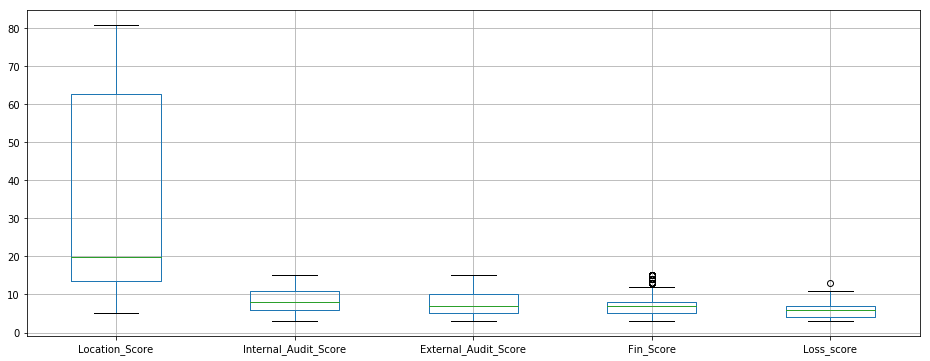

In [10]:
plt.figure(figsize=(16,6))
train.boxplot(column=['Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score'])

<b> From the plots we can see that, there are lots of outliers in each varibale. </b>

### 2.3.2 Plot for Continuous variables

### 2.3.3 Histogram Plots Of Continuous Variables 

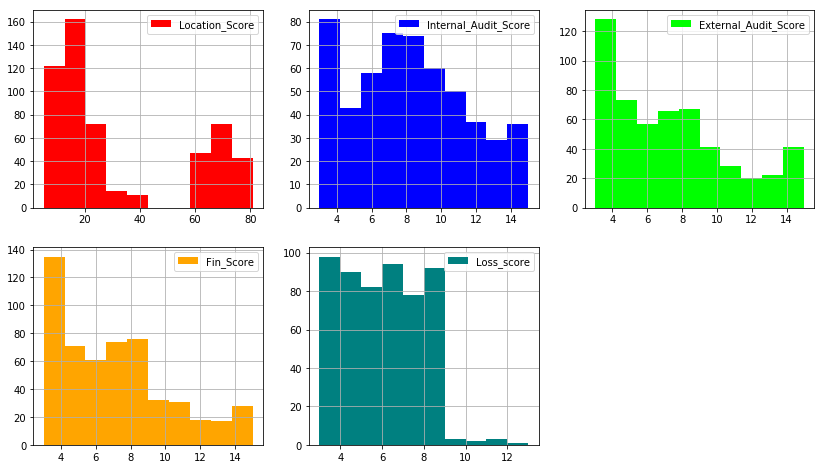

In [16]:
plt.figure(figsize=(14,8))
clr=['red','blue','lime','orange','teal']
columns = ['Location_Score', 'Internal_Audit_Score', 'External_Audit_Score', 'Fin_Score', 'Loss_score']
for i,j in zip(range(1,6),columns):
    plt.subplot(2,3,i)
    train[j].hist(color = clr[i-1], label=j)
    plt.legend()
    

### 2.3.4 Density Plots Of Continuous Variables 

<Figure size 1008x576 with 0 Axes>

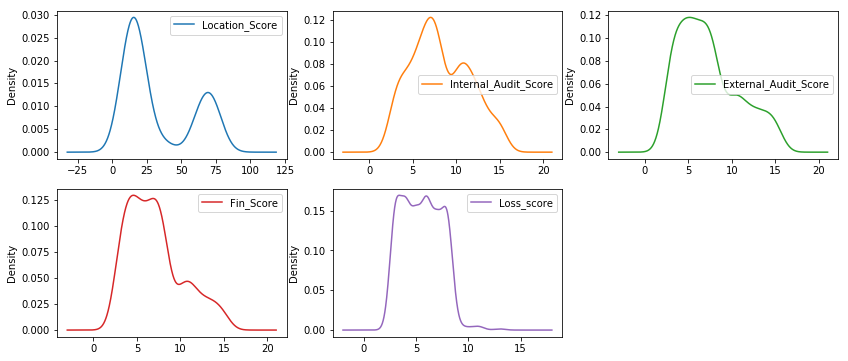

In [18]:
plt.figure(figsize=(14,8))
train[columns].plot(kind='density', subplots=True, 
                                                    layout=(2,3), sharex=False,
                                                    sharey=False, figsize=(14,6))
plt.show()

### 2.3.5 Discrete Variables Plot

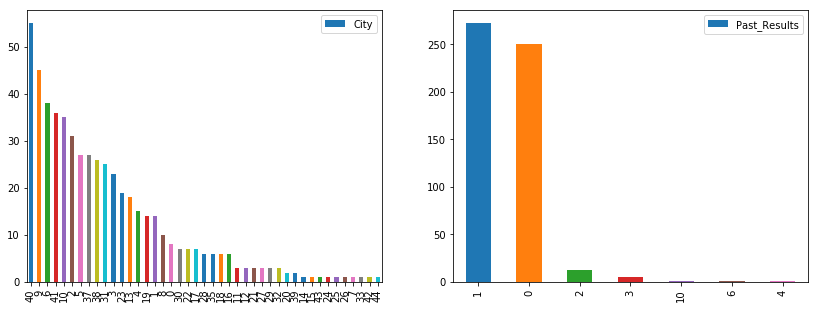

In [28]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
train.City.value_counts().plot(kind='bar', label = 'City')
plt.legend()

plt.subplot(1,2,2)
train.Past_Results.value_counts().plot(kind='bar', label = 'Past_Results')
plt.legend()


### 2.3.5 Target Variable Plot

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


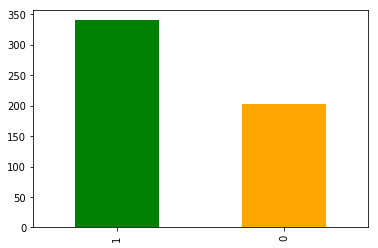

In [22]:
train.IsUnderRisk.value_counts().plot(kind='bar', colors=['green', 'orange'])

# 2.4 Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

### 2.4.1 Correlation Matrix Plot

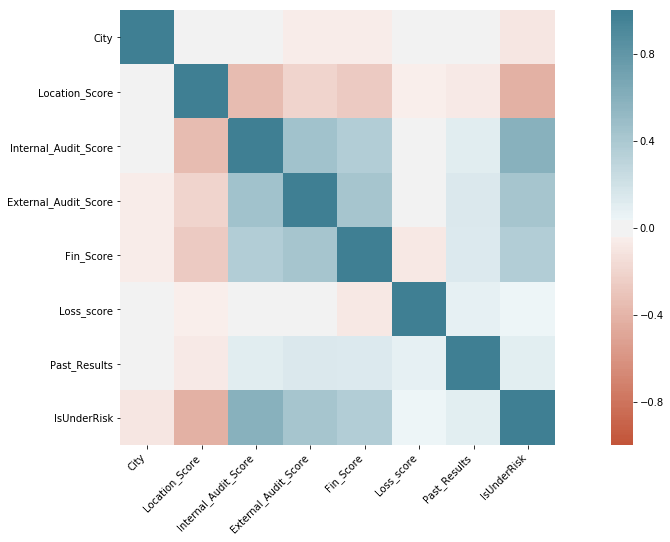

In [29]:
plt.figure(figsize=(20,8))
corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### 2.4.2 Scatterplot Matrix

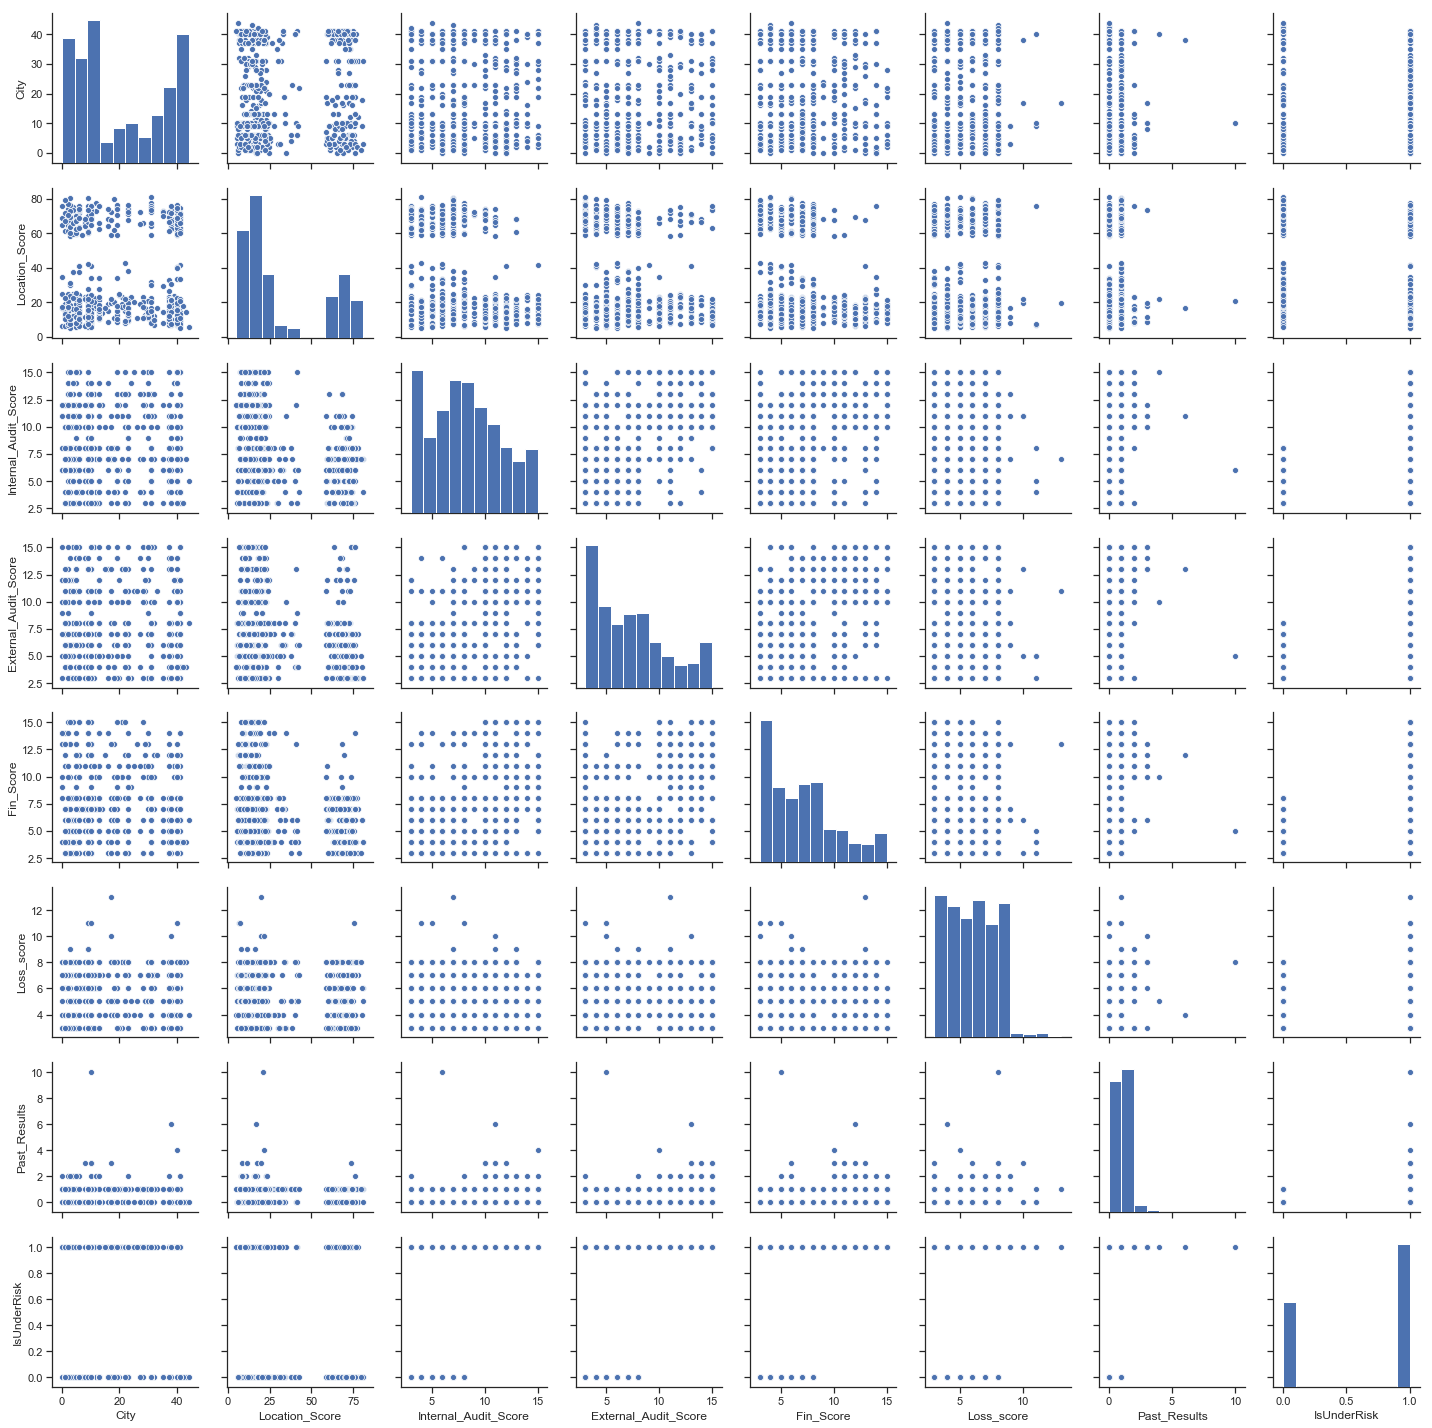

In [30]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train)

# Step4: Separating X and Y

In [33]:
train.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results',
       'IsUnderRisk'],
      dtype='object')

## 4.1 Re-setting Index Before Splitting

In [35]:
train.reset_index(drop=True, inplace=True)

## 4.2 Split Data

In [37]:
x = train.drop(['IsUnderRisk'], axis=1)
y = train['IsUnderRisk']

In [67]:
x_copy = x.copy()

## 4.3 New Variables Creation

In [84]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_copy[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results']])


In [85]:
x_poly.shape

(543, 36)

In [86]:
x_poly

array([[ 1.   ,  2.   ,  8.032, ..., 36.   ,  0.   ,  0.   ],
       [ 1.   , 31.   , 77.73 , ..., 64.   ,  8.   ,  1.   ],
       [ 1.   , 40.   , 59.203, ...,  9.   ,  0.   ,  0.   ],
       ...,
       [ 1.   ,  1.   , 79.243, ..., 64.   ,  8.   ,  1.   ],
       [ 1.   , 40.   , 69.14 , ..., 25.   ,  5.   ,  1.   ],
       [ 1.   , 13.   , 23.332, ...,  9.   ,  6.   ,  4.   ]])

### 4.3.2 Plotting Newly Created Variables

In [32]:
'''plt.figure(figsize=(14,10))
clr=['red','blue','green','pink','lime','orange','indigo','teal',
    'red','blue','green','pink','lime','orange','indigo','teal']
cols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',
        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', 
        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', 
        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',
        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']

for i,j in zip(range(1,17),cols):
    plt.subplot(4,4,i)
    train_deduplicated[j].hist(color = clr[i-1], label=j)
    plt.legend()'''

"plt.figure(figsize=(14,10))\nclr=['red','blue','green','pink','lime','orange','indigo','teal',\n    'red','blue','green','pink','lime','orange','indigo','teal']\ncols = ['elevation_complaints_ratio', 'elevation_violation_ratio', 'avg_adv_weather_metric',\n        'adv_weather_metric_violation_ratio', 'avg_safety_score', 'safety_control_ratio', \n        'safety_turbulence_ratio', 'avg_complaints', 'avg_control_metric', 'avg_turbulence', \n        'avg_cabin_temp', 'avg_elevation', 'avg_violation', 'Total_Safety_Complaints_control_ratio',\n        'Turbulence_In_gforces_Total_Safety_Complaints_ratio', 'Violations_Total_Safety_Complaints_ratio']\n\nfor i,j in zip(range(1,17),cols):\n    plt.subplot(4,4,i)\n    train_deduplicated[j].hist(color = clr[i-1], label=j)\n    plt.legend()"

# Step5: Creating Train and Test Set In Ratio 80:20

In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# Step6: Model Building

## 6.1 Identification Of Best Features

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


df_feat = pd.DataFrame(fit.ranking_, x.columns)
df_feat.rename(columns = {0:"Feature_Ranking"}, inplace=True)


Num Features: 3
Selected Features: [False False  True  True  True False False]
Feature Ranking: [5 4 1 1 1 3 2]


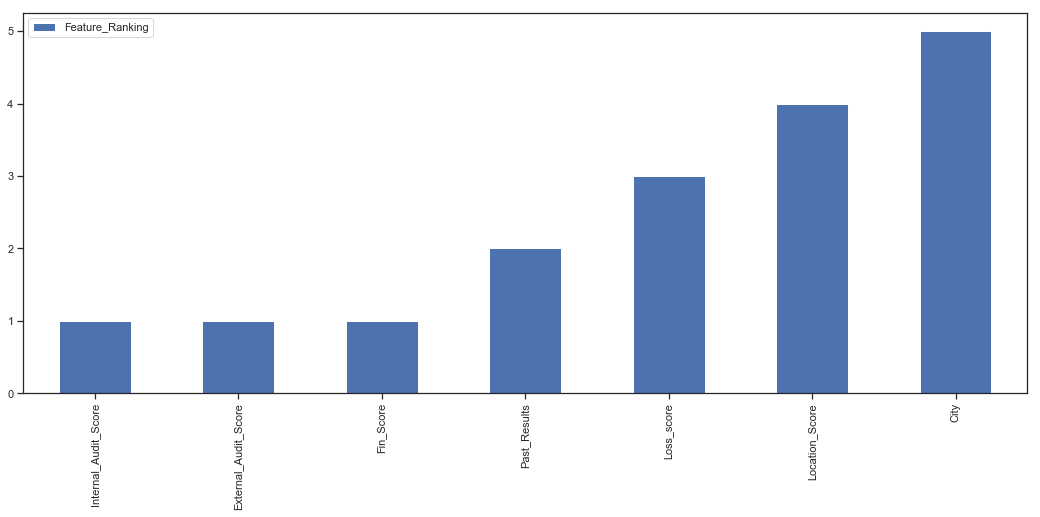

In [40]:
df_feat.sort_values(by="Feature_Ranking").plot(kind='bar', figsize=(18,7))

## 6.2 Importing and Model Fitting

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


### 6.2.1 Decision Trees

In [42]:
from sklearn.tree import DecisionTreeClassifier

#making the instance
model= DecisionTreeClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_dt = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_dt.predict(X_test)

print("*******************ACCURACY***************************************************************")
#Check Prediction Score
print("Accuracy of Decision Trees: ",accuracy_score(y_test, predictions))

print("*******************CLASSIFICATION - REPORT***************************************************************")
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))




*******************ACCURACY***************************************************************
Accuracy of Decision Trees:  0.8165137614678899
*******************CLASSIFICATION - REPORT***************************************************************
Confusion matrix 
 [[37  8]
 [12 52]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        45
           1       0.87      0.81      0.84        64

   micro avg       0.82      0.82      0.82       109
   macro avg       0.81      0.82      0.81       109
weighted avg       0.82      0.82      0.82       109



c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 6.2.2 Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_rf.predict(X_test)

#Check Prediction Score
print("Accuracy of Random Forest: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))



c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy of Random Forest:  0.8899082568807339
Confusion matrix 
 [[42  3]
 [ 9 55]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        45
           1       0.95      0.86      0.90        64

   micro avg       0.89      0.89      0.89       109
   macro avg       0.89      0.90      0.89       109
weighted avg       0.90      0.89      0.89       109



In [90]:
#RF On Full data

#making the instance
model= RandomForestClassifier(random_state=1234)

#Hyper Parameters Set
param_grid = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
#best_clf_rf1 = clf.fit(x, y)
best_clf_rf2 = clf.fit(x_poly, y)

c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 6.2.4 Adaboost

In [58]:
from sklearn.ensemble import AdaBoostClassifier

#making the instance
model= AdaBoostClassifier()

#Hyper Parameters Set
param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_adab = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_adab.predict(X_test)

#Check Prediction Score
print("Accuracy of Adaboost Classifier: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


Accuracy of Adaboost Classifier:  0.8990825688073395
Confusion matrix 
 [[40  5]
 [ 6 58]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.92      0.91      0.91        64

   micro avg       0.90      0.90      0.90       109
   macro avg       0.90      0.90      0.90       109
weighted avg       0.90      0.90      0.90       109



In [87]:
#making the instance
model= AdaBoostClassifier()

#Hyper Parameters Set
param_grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_adab = clf.fit(x_poly, y)


### 6.2.5 MLP Classifier

In [65]:
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
from random import uniform

#making the instance
model= MLPClassifier()

#Hyper Parameters Set
param_grid = {'hidden_layer_sizes': [(sp_randint.rvs(100,600,1),sp_randint.rvs(100,600,1),), 
                                          (sp_randint.rvs(100,600,1),)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [uniform(0.0001, 0.9)],
    'learning_rate': ['constant','adaptive']}

# Create grid search object
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=10)

# Fit on data
best_clf_mlp = clf.fit(X_train, y_train)

#Predict
predictions = best_clf_mlp.predict(X_test)

#Check Prediction Score
print("Accuracy of MLP Classifier: ",accuracy_score(y_test, predictions))

#Print Classification Report
print("Confusion matrix \n",confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


c:\users\bhuwanesh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy of MLP Classifier:  0.8532110091743119
Confusion matrix 
 [[37  8]
 [ 8 56]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        45
           1       0.88      0.88      0.88        64

   micro avg       0.85      0.85      0.85       109
   macro avg       0.85      0.85      0.85       109
weighted avg       0.85      0.85      0.85       109



# Phase2: Applying Model On Test Data

In [44]:
test = pd.read_csv('Test.csv')

test.shape

(233, 7)

In [45]:
test.head(5)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


In [46]:
test.columns

Index(['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results'],
      dtype='object')

In [47]:
test_for_prediction = test[['City', 'Location_Score', 'Internal_Audit_Score',
       'External_Audit_Score', 'Fin_Score', 'Loss_score', 'Past_Results']]

In [88]:
pol_test_data = polynomial_features.fit_transform(test_for_prediction)

In [51]:
#Predict

prediction_from_dt  = best_clf_dt.predict_proba(test_for_prediction)
df_prediction_from_dt = pd.DataFrame(prediction_from_dt)
df_prediction_from_dt.to_excel("Final_output_prediction_from_dt.xlsx")

prediction_from_rf  = best_clf_rf.predict_proba(test_for_prediction)
df_prediction_from_rf = pd.DataFrame(prediction_from_rf)
df_prediction_from_rf.to_excel("Final_output_prediction_from_rf.xlsx")


In [53]:
prediction_from_rf1  = best_clf_rf1.predict_proba(test_for_prediction)
df_prediction_from_rf1 = pd.DataFrame(prediction_from_rf1)
df_prediction_from_rf1.to_excel("Final_output_prediction_from_rf1.xlsx")


In [61]:

prediction_from_adab  = best_clf_adab.predict_proba(test_for_prediction)
df_prediction_from_adab = pd.DataFrame(prediction_from_adab)
df_prediction_from_adab.to_excel("Final_output_prediction_from_adab.xlsx")


In [62]:
def predict_file(model, model_instance, test_data):
    prediction_var = "prediction_from" + model
    file_name = "Final_output_prediction_from_" + model + ".xlsx"
    prediction_var  = model_instance.predict_proba(test_data)
    df_prediction_var = pd.DataFrame(prediction_var)
    df_prediction_var.to_excel(file_name)
    print("{} created.".format(file_name))

In [66]:
predict_file("mlpclassifier", best_clf_mlp, test_for_prediction)

Final_output_prediction_from_mlpclassifier.xlsx created.


In [89]:
predict_file("adabclassifier", best_clf_adab, pol_test_data)

Final_output_prediction_from_adabclassifier.xlsx created.


In [91]:
predict_file("rf2_classifier", best_clf_rf2, pol_test_data)

Final_output_prediction_from_rf2_classifier.xlsx created.


In [106]:
rf_op = pd.read_excel("Final_output_prediction_from_rf1.xlsx")


In [107]:
rf_op.head()

,0,1
0,0.000000,1.000000
1,0.245926,0.754074
2,0.860000,0.140000
3,0.000000,1.000000
4,0.098836,0.901164


In [108]:
rf_op[0] = np.clip(rf_op[0],0.005, 0.995)
rf_op[1] = np.clip(rf_op[1],0.005, 0.995)

In [109]:
rf_op.to_excel("Final_output_prediction_from_rf1_classifier_new.xlsx")